# Preview the data

In [1]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from ucimlrepo import fetch_ucirepo 

In [2]:
statlog_german_credit_data = fetch_ucirepo(id=144) 
  
X = statlog_german_credit_data.data.features
y = statlog_german_credit_data.data.targets

In [4]:
X

,Attribute1,Attribute2,Attribute3,Attribute4,Attribute5,Attribute6,Attribute7,Attribute8,Attribute9,Attribute10,Attribute11,Attribute12,Attribute13,Attribute14,Attribute15,Attribute16,Attribute17,Attribute18,Attribute19,Attribute20
0,A11,6,A34,A43,1169,A65,A75,4,A93,A101,4,A121,67,A143,A152,2,A173,1,A192,A201
1,A12,48,A32,A43,5951,A61,A73,2,A92,A101,2,A121,22,A143,A152,1,A173,1,A191,A201
2,A14,12,A34,A46,2096,A61,A74,2,A93,A101,3,A121,49,A143,A152,1,A172,2,A191,A201
3,A11,42,A32,A42,7882,A61,A74,2,A93,A103,4,A122,45,A143,A153,1,A173,2,A191,A201
4,A11,24,A33,A40,4870,A61,A73,3,A93,A101,4,A124,53,A143,A153,2,A173,2,A191,A201
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,A14,12,A32,A42,1736,A61,A74,3,A92,A101,4,A121,31,A143,A152,1,A172,1,A191,A201
996,A11,30,A32,A41,3857,A61,A73,4,A91,A101,4,A122,40,A143,A152,1,A174,1,A192,A201
997,A14,12,A32,A43,804,A61,A75,4,A93,A101,4,A123,38,A143,A152,1,A173,1,A191,A201
998,A11,45,A32,A43,1845,A61,A73,4,A93,A101,4,A124,23,A143,A153,1,A173,1,A192,A201


In [5]:
y

,class
0,1
1,2
2,1
3,1
4,2
...,...
995,1
996,1
997,1
998,2


# Main Orchestraion Code

In [18]:
import ray
import mlflow
from preprocess import load_data
from models import get_models
from train import train_model
from sklearn.model_selection import train_test_split

In [19]:
!mlflow ui

^C


In [ ]:
ray.init()

2025-06-04 10:27:17,420	INFO worker.py:1743 -- Started a local Ray instance. View the dashboard at 127.0.0.1:8265 


Python version:,3.10.0
Ray version:,2.10.0
Dashboard:,http://127.0.0.1:8265


In [ ]:
import os
import mlflow

os.environ["MLFLOW_TRACKING_URI"] = "http://127.0.0.1:5000"

mlflow.set_tracking_uri(os.environ["MLFLOW_TRACKING_URI"])

mlflow.set_experiment("CreditRisk_Parallel")

<Experiment: artifact_location='mlflow-artifacts:/223546915258277358', creation_time=1749023708517, experiment_id='223546915258277358', last_update_time=1749023708517, lifecycle_stage='active', name='CreditRisk_Parallel', tags={}>

In [ ]:
X, y = load_data()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

c:\Users\szyme\Downloads\lscLSC\lsc_ray_mlflow\src\preprocess.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.loc[:, col] = LabelEncoder().fit_transform(X[col])
c:\Users\szyme\Downloads\lscLSC\lsc_ray_mlflow\src\preprocess.py:21: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  X.loc[:, col] = LabelEncoder().fit_transform(X[col])
c:\Users\szyme\Downloads\lscLSC\lsc_ray_mlflow\src\preprocess.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexe

In [ ]:
all_model_configs = get_models()
print(all_model_configs)

{'LogisticRegression': [{'name': 'LogisticRegression_Default', 'model': LogisticRegression(max_iter=1000, random_state=42)}, {'name': 'LogisticRegression_MaxIter2000', 'model': LogisticRegression(max_iter=2000, random_state=42)}, {'name': 'LogisticRegression_L1_Saga_C01', 'model': LogisticRegression(C=0.1, max_iter=2000, penalty='l1', random_state=42,
                   solver='saga')}, {'name': 'LogisticRegression_L2_Liblinear_C10', 'model': LogisticRegression(random_state=42, solver='liblinear')}], 'RandomForest': [{'name': 'RandomForest_Default', 'model': RandomForestClassifier(random_state=42)}, {'name': 'RandomForest_N200', 'model': RandomForestClassifier(n_estimators=200, random_state=42)}, {'name': 'RandomForest_MaxDepth10', 'model': RandomForestClassifier(max_depth=10, random_state=42)}, {'name': 'RandomForest_MinSamplesSplit10', 'model': RandomForestClassifier(min_samples_split=10, random_state=42)}], 'SVM': [{'name': 'SVM_Default', 'model': SVC(probability=True, random_state=

In [ ]:
futures = []

for model_type, configs in all_model_configs.items():
    print(f"\nPlanowanie {len(configs)} eksperymentów dla {model_type}...")
    for config in configs:
        model_name = config["name"]
        model_instance = config["model"]

        print(f" -> Planowanie zadania dla: {model_name}")
        future = train_model.remote(model_name, model_instance, X_train, X_test, y_train, y_test)
        futures.append(future)

print("\nCzekam na zakończenie wszystkich zadań Ray...")
results = ray.get(futures)

print("\n--- Wszystkie eksperymenty zakończone. Wyniki: ---")
for result in results:
    if isinstance(result, dict) and "name" in result and "accuracy" in result:
        print(f"- Model: {result['name']}, Accuracy: {result['accuracy']:.4f}")
    else:
        print(f"- Nieznany format wyniku: {result}")


Planowanie 4 eksperymentów dla LogisticRegression...
 -> Planowanie zadania dla: LogisticRegression_Default
 -> Planowanie zadania dla: LogisticRegression_MaxIter2000
 -> Planowanie zadania dla: LogisticRegression_L1_Saga_C01
 -> Planowanie zadania dla: LogisticRegression_L2_Liblinear_C10

Planowanie 4 eksperymentów dla RandomForest...
 -> Planowanie zadania dla: RandomForest_Default
 -> Planowanie zadania dla: RandomForest_N200
 -> Planowanie zadania dla: RandomForest_MaxDepth10
 -> Planowanie zadania dla: RandomForest_MinSamplesSplit10

Planowanie 4 eksperymentów dla SVM...
 -> Planowanie zadania dla: SVM_Default
 -> Planowanie zadania dla: SVM_Linear_C01
 -> Planowanie zadania dla: SVM_C10
 -> Planowanie zadania dla: SVM_Poly

Czekam na zakończenie wszystkich zadań Ray...


(train_model pid=3532) c:\Users\szyme\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
(train_model pid=3532)   y = column_or_1d(y, warn=True)
(train_model pid=13848) c:\Users\szyme\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
(train_model pid=13848)   return fit_method(estimator, *args, **kwargs)
(train_model pid=11136) c:\Users\szyme\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
(train_model pid=11136) STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.
(train_model pid=11136) 
(train_model pid=11136) I

(train_model pid=11136) 🏃 View run LogisticRegression_Default at: http://127.0.0.1:5000/#/experiments/223546915258277358/runs/1624168a79834f4c9826fcd11935dee1
(train_model pid=11136) 🧪 View experiment at: http://127.0.0.1:5000/#/experiments/223546915258277358
(train_model pid=16672) 🏃 View run LogisticRegression_L2_Liblinear_C10 at: http://127.0.0.1:5000/#/experiments/223546915258277358/runs/d36a90aa97d54609b30c1bbda3b4ae3a
(train_model pid=13848) 🏃 View run RandomForest_Default at: http://127.0.0.1:5000/#/experiments/223546915258277358/runs/6ef8966f8cb1453c889f22f9ddcf8e9e


(train_model pid=11136) 2025/06/04 10:31:54 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature. [repeated 8x across cluster]
(train_model pid=13848) c:\Users\szyme\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel(). [repeated 4x across cluster]
(train_model pid=13848)   y = column_or_1d(y, warn=True) [repeated 4x across cluster]


(train_model pid=11136) 🏃 View run SVM_Default at: http://127.0.0.1:5000/#/experiments/223546915258277358/runs/9cd2bc69cb1b44e3b03407d9644f61f2
(train_model pid=11136) 🧪 View experiment at: http://127.0.0.1:5000/#/experiments/223546915258277358 [repeated 8x across cluster]
(train_model pid=20464) 🏃 View run LogisticRegression_L1_Saga_C01 at: http://127.0.0.1:5000/#/experiments/223546915258277358/runs/47f0d9e7cec9468f914c2e76cac22cbe [repeated 5x across cluster]
(train_model pid=13848) 🏃 View run SVM_Poly at: http://127.0.0.1:5000/#/experiments/223546915258277358/runs/b1af7b8651444335aa5eec3c6cfef3a1


KeyboardInterrupt: 

Celowy przykład - wyżej KeyboardInterrupt

Tj. przerwaliśmy działanie programu, a jednak MLFlow je dokończył (patrz dłuższy przykład z SVM_Linear_C01)

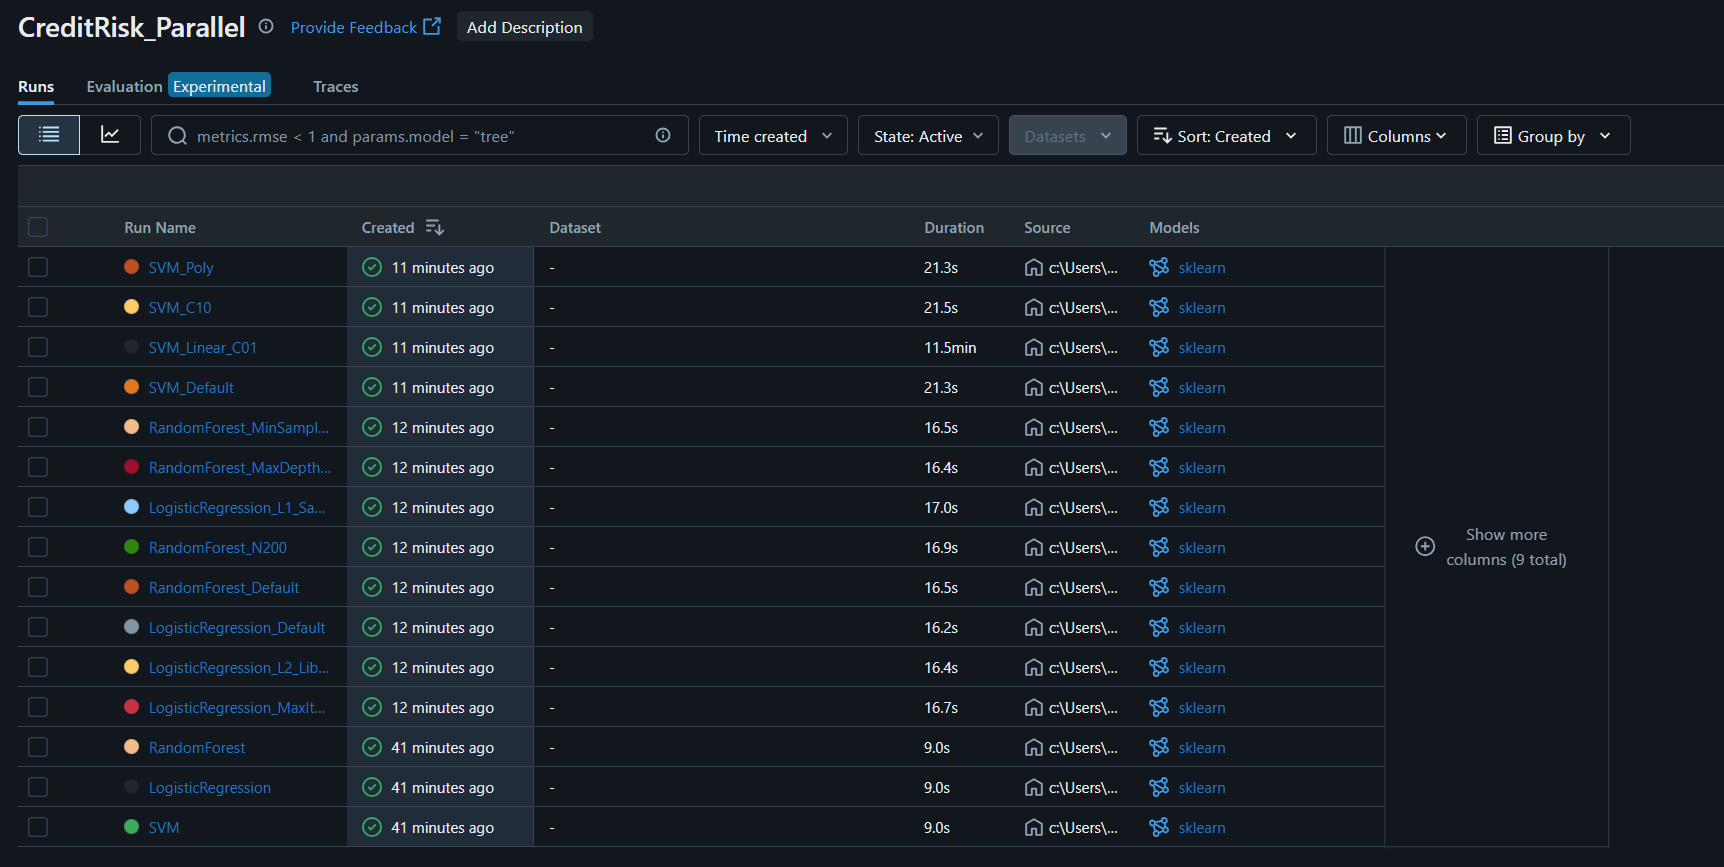

Wszystkie metryki można także znaleźć w MLFlow
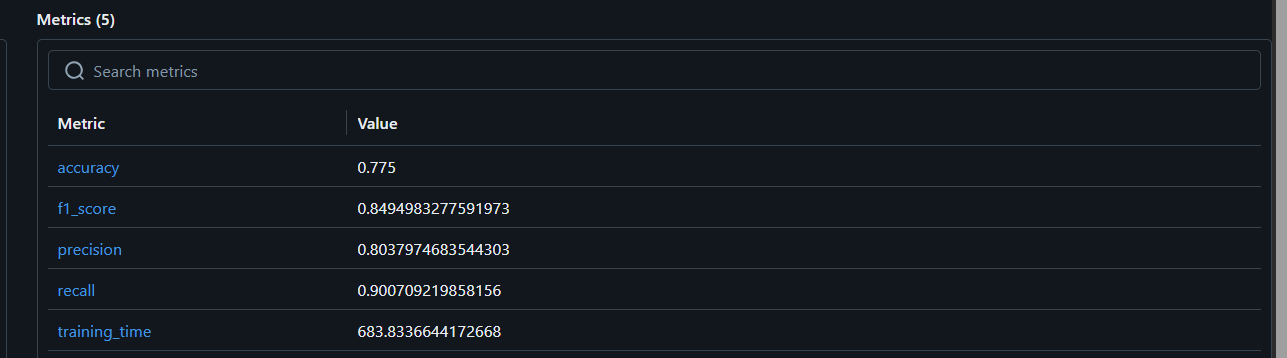

In [22]:
print("\nCzekam na zakończenie wszystkich zadań Ray...")
results = ray.get(futures)

print("\n--- Wszystkie eksperymenty zakończone. Wyniki: ---")
for result in results:
    print(result)


Czekam na zakończenie wszystkich zadań Ray...

--- Wszystkie eksperymenty zakończone. Wyniki: ---
('LogisticRegression_Default', 0.775, 0.8484848484848485)
('LogisticRegression_MaxIter2000', 0.775, 0.8484848484848485)
('LogisticRegression_L1_Saga_C01', 0.715, 0.831858407079646)
('LogisticRegression_L2_Liblinear_C10', 0.775, 0.8484848484848485)
('RandomForest_Default', 0.805, 0.8695652173913043)
('RandomForest_N200', 0.79, 0.86)
('RandomForest_MaxDepth10', 0.78, 0.8562091503267973)
('RandomForest_MinSamplesSplit10', 0.77, 0.847682119205298)
('SVM_Default', 0.715, 0.8308605341246291)
('SVM_Linear_C01', 0.775, 0.8494983277591973)
('SVM_C10', 0.715, 0.8308605341246291)
('SVM_Poly', 0.72, 0.834319526627219)


In [ ]:
import mlflow
import mlflow.sklearn
import pandas as pd
import numpy as np
from mlflow.models import infer_signature
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

import os
os.environ["MLFLOW_TRACKING_URI"] = "http://127.0.0.1:5000"
mlflow.set_tracking_uri(os.environ["MLFLOW_TRACKING_URI"])
mlflow.set_experiment("CreditRisk_Parallel") # Logujemy do tego samego eksperymentu

from sklearn.ensemble import RandomForestClassifier
best_trained_model = RandomForestClassifier(n_estimators=200, max_depth=10, random_state=42)
print("Test logowania modelu w MLFlow")
best_trained_model.fit(X_train, y_train)

run_name_for_manual_log = "Manual_Log_Best_RandomForest_Final"

with mlflow.start_run(run_name=run_name_for_manual_log):
    print(f"MLflow Run ID: {mlflow.active_run().info.run_id}")

    y_pred = best_trained_model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, zero_division=0)
    prec = precision_score(y_test, y_pred, zero_division=0)
    recall = recall_score(y_test, y_pred, zero_division=0)

    mlflow.log_param("model_type", best_trained_model.__class__.__name__)
    for param, value in best_trained_model.get_params().items():
        mlflow.log_param(f"param_{param}", value)
    mlflow.log_param("log_method", "manual_final_log")
    mlflow.log_param("original_ray_run", "NotApplicable")

    mlflow.log_metric("accuracy", acc)
    mlflow.log_metric("f1_score", f1)
    mlflow.log_metric("precision", prec)
    mlflow.log_metric("recall", recall)
    mlflow.log_metric("training_time", 0.0)

    print(f"Metryki zalogowane: Accuracy={acc:.4f}, F1={f1:.4f}")

    signature = None
    input_example = None
    if isinstance(X_train, (pd.DataFrame, np.ndarray)) and len(X_train) > 0:
        try:
            signature = infer_signature(X_train.head(1) if isinstance(X_train, pd.DataFrame) else X_train[0:1],
                                        best_trained_model.predict(X_train.head(1) if isinstance(X_train, pd.DataFrame) else X_train[0:1]))

            input_example = X_train.sample(n=min(5, len(X_train)), random_state=42) if isinstance(X_train, pd.DataFrame) else X_train[:min(5, len(X_train))]
            print("Sygnatura modelu i przykład wejścia wywnioskowane.")
        except Exception as sig_e:
            print(f"OSTRZEŻENIE: Nie udało się wywnioskować sygnatury modelu lub przykładu wejścia: {sig_e}")
    else:
        print("OSTRZEŻENIE: X_train jest puste lub nie jest obsługiwanym typem dla inferencji sygnatury/przykładu wejścia.")

    mlflow.sklearn.log_model(
        sk_model=best_trained_model,
        artifact_path="model",
        registered_model_name="CreditRiskClassifier" 
    )
    print("Model zalogowany pomyślnie do ścieżki artefaktów 'model'.")

print(f"Run MLflow '{run_name_for_manual_log}' zakończony.")

Trenuję model do manualnego logowania (jeśli nie jest już w pamięci)


c:\Users\szyme\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Model do manualnego logowania wytrenowany.

Rozpoczynam nowy run MLflow dla ręcznego logowania: Manual_Log_Best_RandomForest_Final
MLflow Run ID: 79e1ec3cdb6f41a78fc0c6de3f91ab1d
Metryki zalogowane: Accuracy=0.7850, F1=0.8581
Sygnatura modelu i przykład wejścia wywnioskowane.


c:\Users\szyme\AppData\Local\Programs\Python\Python310\lib\site-packages\mlflow\types\utils.py:452: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains missing values at inference time, it will be encoded as floats and will cause a schema enforcement error. The best way to avoid this problem is to infer the model schema based on a realistic data sample (training dataset) that includes missing values. Alternatively, you can declare integer columns as doubles (float64) whenever these columns may have missing values. See `Handling Integers With Missing Values <https://www.mlflow.org/docs/latest/models.html#handling-integers-with-missing-values>`_ for more details.
  warnings.warn(
2025/06/04 10:50:26 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
Successfully regist

Model zalogowany pomyślnie do ścieżki artefaktów 'model'.
🏃 View run Manual_Log_Best_RandomForest_Final at: http://127.0.0.1:5000/#/experiments/223546915258277358/runs/79e1ec3cdb6f41a78fc0c6de3f91ab1d
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/223546915258277358
Run MLflow 'Manual_Log_Best_RandomForest_Final' zakończony.


Created version '1' of model 'CreditRiskClassifier'.


Dzieki powyzszemu, mozemy zapisać nasz model w Modelach w MLFlow!

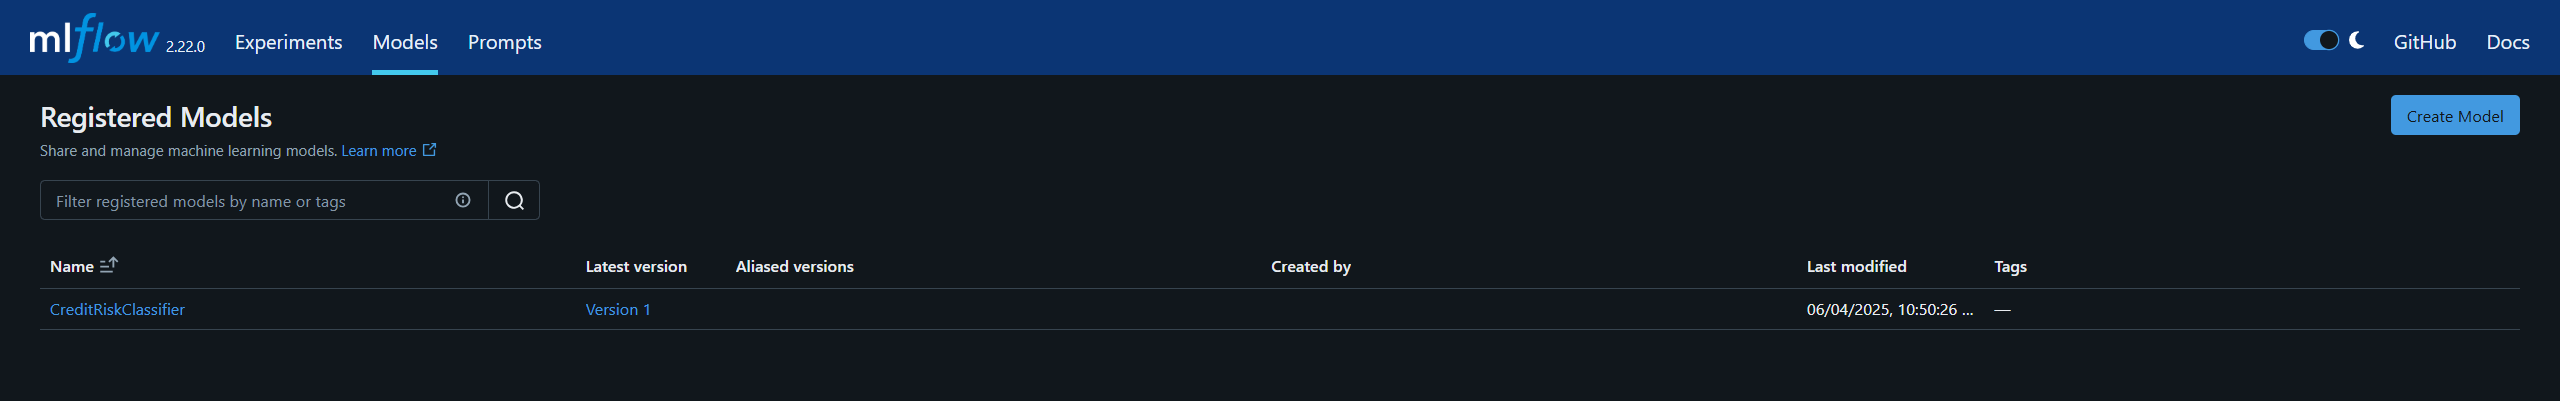